In [2]:
!pip install scikit-learn

In [3]:
!pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.utils import to_categorical

In [8]:
df = load_digits().images

In [9]:
df.shape

(1797, 8, 8)

In [19]:
target = load_digits().target

In [20]:
target.shape

(1797,)

In [21]:
df[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [22]:
target[0]

0

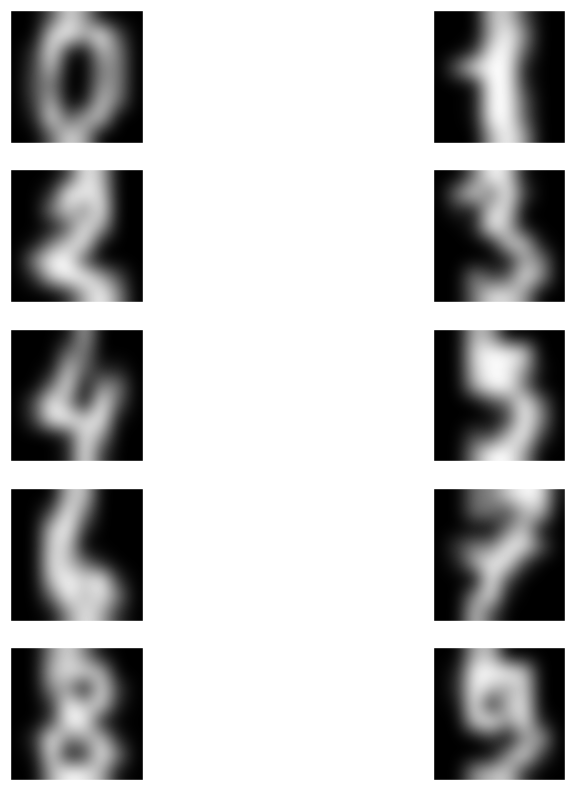

In [25]:
# Data - Visualization

plt.style.use('ggplot')
s=1
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,2,s)
    plt.imshow(df[i],cmap="gray",interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    s+=1

plt.show()

In [26]:
classes = [i for i in range(10)]
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [27]:
X = df
y = target

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [30]:
w,h = df[0].shape
print(w)
print(h)

8
8


In [31]:
X_train = X_train.reshape(len(X_train),w*h)
X_test = X_test.reshape(len(X_test),w*h)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [36]:
#Funciton

def Prediction_cat(model, image):
    global w, h
    pred = model.predict(image)
    color = ["red"] * 10
    num = pred.argmax()
    color[num] = "blue"
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image.reshape(w, h), cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.title("Image")
    plt.subplot(1, 2, 2)
    plt.bar(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], height=pred.flatten(), color=color)
    plt.xlabel("Digits")
    plt.ylabel("probability")
    plt.title("Prediction")
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.show()

In [37]:
model = Sequential()

model.add(Dense(64, input_shape=X_train[0].shape, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

history = model.fit(X_train, y_train_cat, batch_size=32, epochs=20, validation_split=0.1)


Epoch 1/20
33/33 [==============================] - 2s 10ms/step - loss: 1.2081 - acc: 0.6166 - val_loss: 0.4034 - val_acc: 0.9231
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.3056 - acc: 0.9096 - val_loss: 0.1910 - val_acc: 0.9316
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.1634 - acc: 0.9515 - val_loss: 0.1011 - val_acc: 0.9573
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1043 - acc: 0.9638 - val_loss: 0.0880 - val_acc: 0.9573
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0675 - acc: 0.9829 - val_loss: 0.0836 - val_acc: 0.9744
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0400 - acc: 0.9933 - val_loss: 0.0802 - val_acc: 0.9744
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0300 - acc: 0.9962 - val_loss: 0.0637 - val_acc: 0.9658
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0228 - acc: 0.9

20/20 [==============================] - 0s 2ms/step - loss: 0.1277 - acc: 0.9730
loss : 0.12766073644161224
acc : 0.9729729890823364


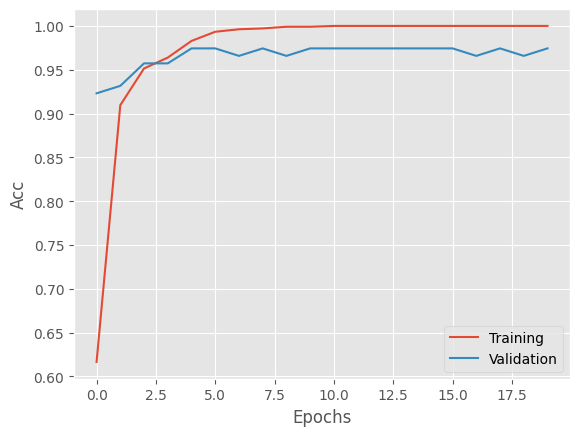

In [39]:
result = model.evaluate(X_test.reshape(629, 64), y_test_cat)
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i], ":", result[i])

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training", "Validation"])
plt.show()


1/1 [==============================] - 0s 31ms/step


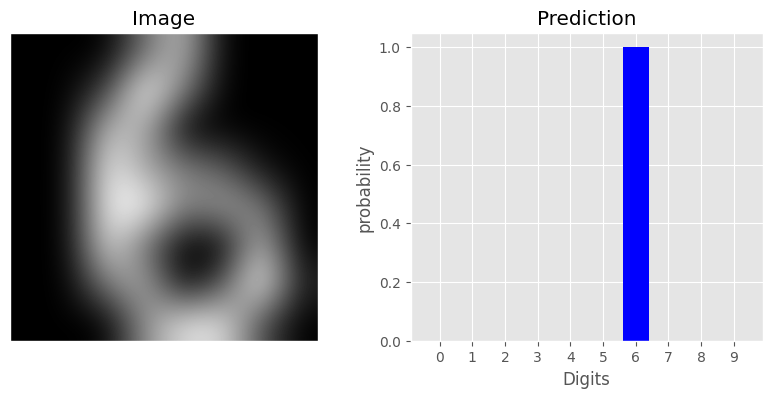

1/1 [==============================] - 0s 42ms/step


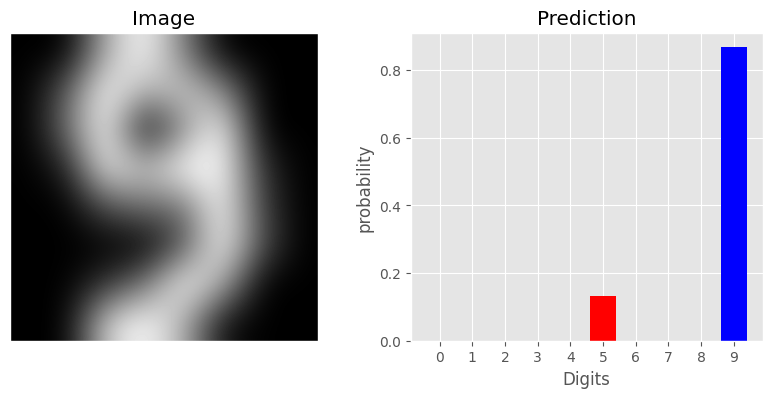

1/1 [==============================] - 0s 38ms/step


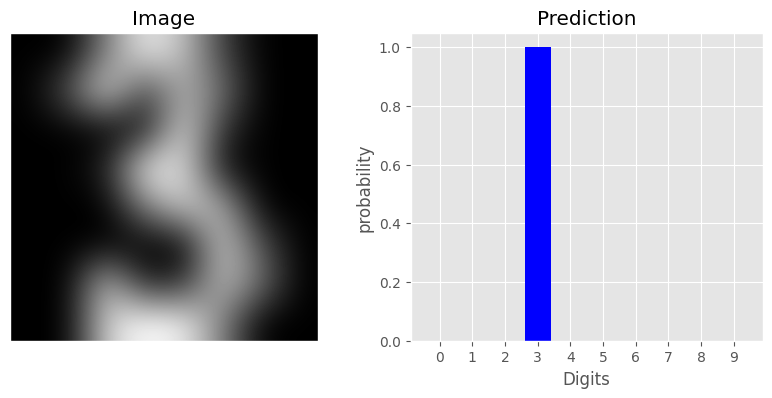

1/1 [==============================] - 0s 47ms/step


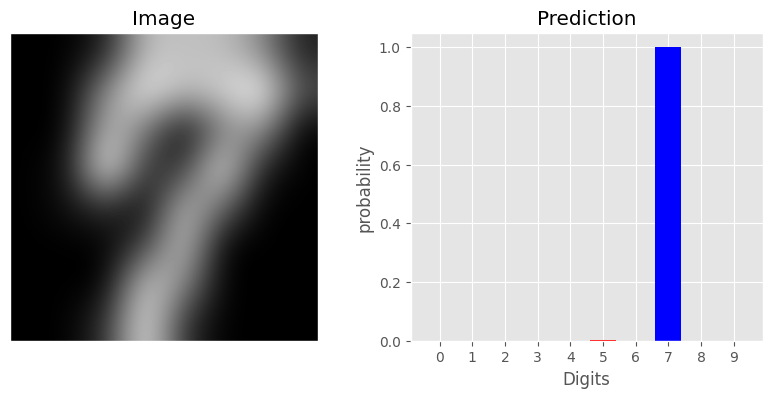

1/1 [==============================] - 0s 26ms/step


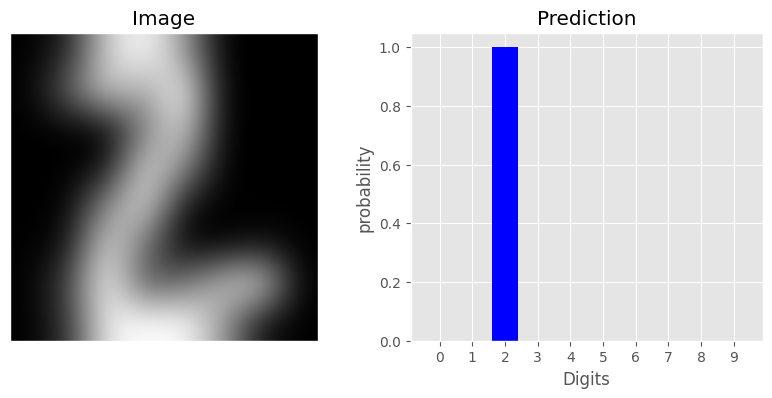

In [40]:
for i in range(5):
    Prediction_cat(model, X_test[i].reshape(1, -1))